In [1]:
from preprocessing import *
from train_evaluate import *
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import DataLoader
from torchsummary import summary

import numpy as np

# Data Setup

## Load Data

In [2]:
data_dir = '/Users/michael/Desktop/Home/研究所/ECE247/projects/data/'
X_train_valid, y_train_valid, X_test, y_test = load_data(data_dir, subjects=[1]) # default subjects=[1,2,3,4,5,6,7,8,9]

## Preprocessing

In [3]:
x_train, y_train, x_valid, y_valid, x_test, y_test = main_prep(X_train_valid,y_train_valid,X_test, y_test,2,2,True)

Shape of x_train: (758, 250, 1, 22)
Shape of x_valid: (190, 250, 1, 22)
Shape of x_test: (200, 250, 1, 22)
Shape of y_train: torch.Size([758, 4])
Shape of y_valid: torch.Size([190, 4])
Shape of y_test: torch.Size([200, 4])


## PyTorch Dataloaders

In [4]:
data_loaders  = dataloader_setup(x_train, y_train, x_valid, y_valid, x_test, y_test, batch_size=32)

# LSTM

In [5]:
class LSTM(nn.Module):
    
    def __init__(self):
        super(LSTM, self).__init__()

        self.lstm = nn.LSTM(22, 64, 3, batch_first=True, dropout=0.5)

        self.fc = nn.Sequential(
            nn.Linear(64, 54),
            nn.BatchNorm1d(num_features=54, eps=1e-05, momentum=0.2, affine=True),
            nn.ReLU(inplace = True),
            nn.Dropout(p=0.5),
            nn.Linear(54, 44),
            nn.BatchNorm1d(num_features=44, eps=1e-05, momentum=0.2, affine=True),
            nn.ReLU(inplace = True),
            nn.Linear(44, 4)
        )
    
    def forward(self, x, h=None):

        # LSTM
        N, C, H, W = x.size()
        x = x.view(N, C, W).permute(0, 2, 1)
        out, _ = self.lstm(x)

        # Fully Connected Layer
        out = self.fc(out[:, -1, :])

        return out

# Train / Validate / Test

In [6]:
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 50

In [7]:
# initiate LSTM model
model = LSTM()

# create your optimizer
optimizer = optim.Adam(lstm.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)

Training Progress: 	Epoch 1 [0/758 (0.00%)]		Loss: 1.33271
Training Progress: 	Epoch 1 [320/758 (41.67%)]		Loss: 1.46610
Training Progress: 	Epoch 1 [640/758 (83.33%)]		Loss: 1.44777
	Train loss: 0.04436, Accuracy: 196/758 (25.00%)
	Validation loss: 0.00743, Accuracy: 45/190 (23.00%)
	Test loss: 0.00701, Accuracy: 48/200 (24.00%)

Training Progress: 	Epoch 2 [0/758 (0.00%)]		Loss: 1.37888
Training Progress: 	Epoch 2 [320/758 (41.67%)]		Loss: 1.48760
Training Progress: 	Epoch 2 [640/758 (83.33%)]		Loss: 1.44180
	Train loss: 0.04429, Accuracy: 202/758 (26.00%)
	Validation loss: 0.00742, Accuracy: 42/190 (22.00%)
	Test loss: 0.00702, Accuracy: 46/200 (23.00%)

Training Progress: 	Epoch 3 [0/758 (0.00%)]		Loss: 1.36359
Training Progress: 	Epoch 3 [320/758 (41.67%)]		Loss: 1.51968
Training Progress: 	Epoch 3 [640/758 (83.33%)]		Loss: 1.49050
	Train loss: 0.04440, Accuracy: 201/758 (26.00%)
	Validation loss: 0.00745, Accuracy: 40/190 (21.00%)
	Test loss: 0.00706, Accuracy: 50/200 (25.00%)

T

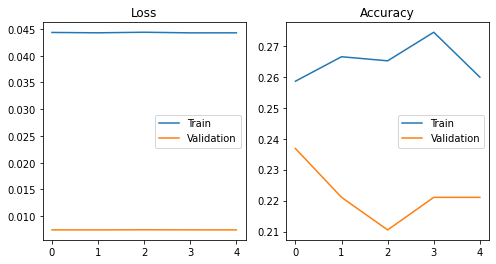

In [8]:
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)